In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds

mnist_data = tfds.load("mnist", with_info=True)
mnist_train, mnist_test, mnist_info = mnist_data[0]["train"], mnist_data[0]["test"], mnist_data[1]
assert isinstance(mnist_train, tf.data.Dataset)

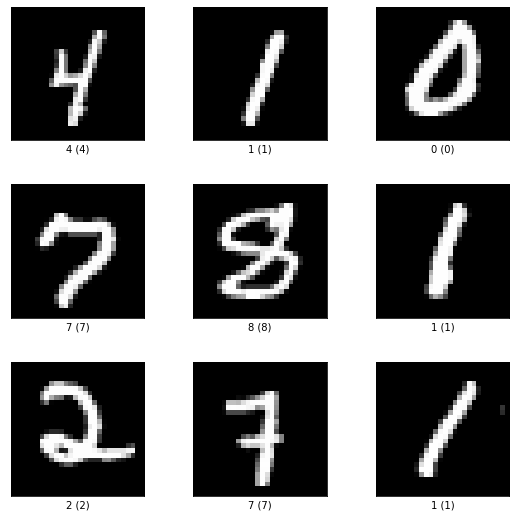

In [3]:
fig = tfds.show_examples(mnist_train, mnist_info)

In [128]:
it_train = mnist_train.as_numpy_iterator()
it_test = mnist_test.as_numpy_iterator()
x_train, x_test, y_train, y_test = np.zeros((60000, 784)), np.zeros((10000, 784)), np.zeros((60000, 1)), np.zeros((10000, 1))

In [129]:
i = 0;
for e in it_train:
    x_train[i] = e['image'].reshape(-1)
    y_train[i] = e['label']
    i+=1

In [130]:
i = 0;
for e in it_test:
    x_test[i] = e['image'].reshape(-1)
    y_test[i] = e['label']
    i+=1

In [131]:
# one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [151]:
model = tf.keras.models.Sequential()

In [152]:
model.add(tf.keras.Input(shape=(784,)))

In [153]:
model.add(tf.keras.layers.Dense(256, 'tanh'))

In [154]:
model.add(tf.keras.layers.Dense(256, 'tanh'))
model.add(tf.keras.layers.Dense(10, 'softmax'))

In [155]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [147]:
# maybe
mm = (x_train.mean() + x_test.mean())/2
x_train -= mm
x_test -= mm
mm

8.715250743307479e-15

In [156]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss='categorical_crossentropy',
    # List of metrics to monitor
    metrics=['categorical_accuracy'],
)

In [139]:
print(x_train.shape)
print(x_test.shape,'\n')

print(y_train.shape)
print(y_test.shape)
print(y_train[:3])

(60000, 784)
(10000, 784) 

(60000, 10)
(10000, 10)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [157]:
model.fit(
    x_train,
    y_train,
    batch_size=512, 
    epochs=40,
    validation_data=(x_test, y_test)
)

Epoch 1/40
118/118 [==============================] - 2s 14ms/step - loss: 0.4887 - categorical_accuracy: 0.8512 - val_loss: 0.3195 - val_categorical_accuracy: 0.9019
Epoch 2/40
118/118 [==============================] - 2s 13ms/step - loss: 0.3145 - categorical_accuracy: 0.9050 - val_loss: 0.2984 - val_categorical_accuracy: 0.9092
Epoch 3/40
118/118 [==============================] - 2s 13ms/step - loss: 0.2841 - categorical_accuracy: 0.9121 - val_loss: 0.2822 - val_categorical_accuracy: 0.9116
Epoch 4/40
118/118 [==============================] - 2s 13ms/step - loss: 0.2635 - categorical_accuracy: 0.9187 - val_loss: 0.2645 - val_categorical_accuracy: 0.9186
Epoch 5/40
118/118 [==============================] - 2s 13ms/step - loss: 0.2419 - categorical_accuracy: 0.9260 - val_loss: 0.2270 - val_categorical_accuracy: 0.9302
Epoch 6/40
118/118 [==============================] - 2s 13ms/step - loss: 0.2433 - categorical_accuracy: 0.9239 - val_loss: 0.2351 - val_categorical_accuracy: 0.926

In [117]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on test data
20/20 [==============================] - 0s 6ms/step - loss: 0.1330 - categorical_accuracy: 0.9580
test loss, test acc: [0.1330365240573883, 0.9580000042915344]


In [150]:
# Second evaluation with "offset data"
print("Evaluation of 'normalized'")
results = model.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluation of 'normalized'
20/20 [==============================] - 0s 7ms/step - loss: 0.1395 - categorical_accuracy: 0.9575
test loss, test acc: [0.13948050141334534, 0.9574999809265137]


In [84]:
import random

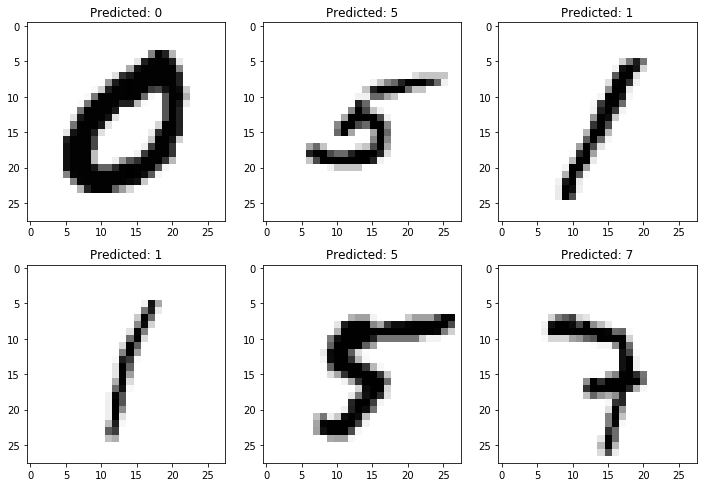

In [123]:
axes=[]
fig=plt.figure(figsize=(10,10))

for a in range(6):
    n = random.randint(0, x_test.shape[0])
    axes.append(fig.add_subplot(3, 3, a+1) )
    subplot_title=("Predicted: " + str(np.argmax(model.predict(x_test[n].reshape(1, -1)))))
    axes[-1].set_title(subplot_title)
    plt.imshow(x_test[n].reshape(28,28), cmap="Greys")
fig.tight_layout()
plt.show()